In [1]:
import pandas as pd

# Importing Excel file data

In [2]:
xlx= pd.ExcelFile('Data Science Case study Vindiata.xls')

In [3]:
# Operations Sheet
operations= pd.read_excel(xlx,'Operations',header=3)
operations.drop(operations.columns[0], axis = 1, inplace = True)

In [4]:
operations.head()

,Aircraft Name,Aircraft Type,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00
0,A,A320,250,251,248,253,243,245,248,246,256,256,251,252
1,B,A330,300,301,298,303,293,295,298,296,306,306,301,302
2,C,B737,245,246,243,248,238,240,243,241,251,251,246,247
3,D,B747,310,311,308,313,303,305,308,306,316,316,311,312
4,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202


In [5]:
# Renaming Columns of Operation sheet
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
operations.rename(columns=dict(zip(operations.columns[2:], months)), inplace=True)

In [6]:
operations.head()

,Aircraft Name,Aircraft Type,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,A,A320,250,251,248,253,243,245,248,246,256,256,251,252
1,B,A330,300,301,298,303,293,295,298,296,306,306,301,302
2,C,B737,245,246,243,248,238,240,243,241,251,251,246,247
3,D,B747,310,311,308,313,303,305,308,306,316,316,311,312
4,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202


In [7]:
#Adding hours flown of aircraft of every month
operations['total_hr_flown']= operations.iloc[:,2:].sum(axis=1)

In [8]:
operations.head()

,Aircraft Name,Aircraft Type,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,total_hr_flown
0,A,A320,250,251,248,253,243,245,248,246,256,256,251,252,2999
1,B,A330,300,301,298,303,293,295,298,296,306,306,301,302,3599
2,C,B737,245,246,243,248,238,240,243,241,251,251,246,247,2939
3,D,B747,310,311,308,313,303,305,308,306,316,316,311,312,3719
4,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202,2399


In [9]:
#Aircraft Characteristics Sheet and removing all irrelevant columns
Ac_Char = pd.read_excel(xlx,'AC characteristics', header=3)
Ac_Char.drop(Ac_Char.columns[0], axis=1, inplace=True)

In [10]:
Ac_Char.head()

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour
0,A320,5000,800,150,5000
1,A330,8000,900,250,7500
2,B737,5000,800,150,5100
3,B747,10000,900,350,12000
4,Q400,1500,750,90,3500


In [11]:
#City Pairs sheet and removing irrelevant columns
cityPairs= pd.read_excel(xlx,'City pairs',header=3)
cityPairs.drop(cityPairs.columns[0], axis=1, inplace=True)

In [12]:
cityPairs.head()

,Origin City,Desitnation City,Pass. Demand \n(per day),Distance (km)
0,AA,BB,420,3000
1,BB,CC,450,6500
2,CC,AA,300,400
3,AA,DD,300,1000


# Calculating total hours flown by each type of aircraft

In [13]:
df= operations.groupby('Aircraft Type').sum()

In [14]:
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,total_hr_flown
Aircraft Type,,,,,,,,,,,,,
A320,1240,1245,1230,1255,1205,1215,1230,1220,1270,1270,1245,1250,14875
A330,1820,1826,1808,1838,1778,1790,1808,1796,1856,1856,1826,1832,21834
ATR72,795,799,787,807,767,775,787,779,819,819,799,803,9536
B737,985,989,977,997,957,965,977,969,1009,1009,989,993,11816
B747,920,923,914,929,899,905,914,908,938,938,923,926,11037
Q400,790,794,782,802,762,770,782,774,814,814,794,798,9476


Merging Ac characteristics df and operations df

In [15]:

airline= pd.merge(Ac_Char,df,left_on='Aircraft Type',right_on='Aircraft Type')

In [16]:
airline

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,total_hr_flown
0,A320,5000,800,150,5000,1240,1245,1230,1255,1205,1215,1230,1220,1270,1270,1245,1250,14875
1,A330,8000,900,250,7500,1820,1826,1808,1838,1778,1790,1808,1796,1856,1856,1826,1832,21834
2,B737,5000,800,150,5100,985,989,977,997,957,965,977,969,1009,1009,989,993,11816
3,B747,10000,900,350,12000,920,923,914,929,899,905,914,908,938,938,923,926,11037
4,Q400,1500,750,90,3500,790,794,782,802,762,770,782,774,814,814,794,798,9476
5,ATR72,1000,650,75,2750,795,799,787,807,767,775,787,779,819,819,799,803,9536


# Aircraft's Total Cost in dollar

Total cost = Total hours flown * Costs/hour

In [17]:
airline['Total_Cost'] = airline['total_hr_flown'] * airline['Costs per flight hour']

In [18]:
airline

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,total_hr_flown,Total_Cost
0,A320,5000,800,150,5000,1240,1245,1230,1255,1205,1215,1230,1220,1270,1270,1245,1250,14875,74375000
1,A330,8000,900,250,7500,1820,1826,1808,1838,1778,1790,1808,1796,1856,1856,1826,1832,21834,163755000
2,B737,5000,800,150,5100,985,989,977,997,957,965,977,969,1009,1009,989,993,11816,60261600
3,B747,10000,900,350,12000,920,923,914,929,899,905,914,908,938,938,923,926,11037,132444000
4,Q400,1500,750,90,3500,790,794,782,802,762,770,782,774,814,814,794,798,9476,33166000
5,ATR72,1000,650,75,2750,795,799,787,807,767,775,787,779,819,819,799,803,9536,26224000


In [19]:
airline[['Aircraft Type','Total_Cost']]

,Aircraft Type,Total_Cost
0,A320,74375000
1,A330,163755000
2,B737,60261600
3,B747,132444000
4,Q400,33166000
5,ATR72,26224000


# Cost ($) per seat per km flown by Aircraft Type

In [20]:
airline['Cost_per_seat_per_km']= airline['Total_Cost'] / (airline['Number of Seats'] * airline['total_hr_flown'] * airline['Ave. Speed (km/h)'])

In [21]:
airline

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,total_hr_flown,Total_Cost,Cost_per_seat_per_km
0,A320,5000,800,150,5000,1240,1245,1230,1255,1205,1215,1230,1220,1270,1270,1245,1250,14875,74375000,0.041667
1,A330,8000,900,250,7500,1820,1826,1808,1838,1778,1790,1808,1796,1856,1856,1826,1832,21834,163755000,0.033333
2,B737,5000,800,150,5100,985,989,977,997,957,965,977,969,1009,1009,989,993,11816,60261600,0.042500
3,B747,10000,900,350,12000,920,923,914,929,899,905,914,908,938,938,923,926,11037,132444000,0.038095
4,Q400,1500,750,90,3500,790,794,782,802,762,770,782,774,814,814,794,798,9476,33166000,0.051852
5,ATR72,1000,650,75,2750,795,799,787,807,767,775,787,779,819,819,799,803,9536,26224000,0.056410


In [22]:
airline[['Aircraft Type','Cost_per_seat_per_km']].sort_values(by='Cost_per_seat_per_km')

,Aircraft Type,Cost_per_seat_per_km
1,A330,0.033333
3,B747,0.038095
0,A320,0.041667
2,B737,0.042500
4,Q400,0.051852
5,ATR72,0.056410


Aircraft Type which has lowest cost per seat per km flown

In [23]:
airline[['Aircraft Type','Cost_per_seat_per_km']].min()

Aircraft Type               A320
Cost_per_seat_per_km    0.033333
dtype: object

In [24]:
#Number of flights of a particular type
operations['Aircraft Type'].value_counts()

A330     6
A320     5
B737     4
Q400     4
ATR72    4
B747     3
Name: Aircraft Type, dtype: int64

In [25]:
#Correlation between Total Cost and other features
corr_matrix= airline.corr()
corr_matrix['Total_Cost'].sort_values(ascending=False)

Total_Cost               1.000000
Ave. Speed (km/h)        0.917095
Range (Km)               0.915326
Number of Seats          0.880324
Costs per flight hour    0.811469
MAY                      0.773503
JUN                      0.771895
AUG                      0.771094
MAR                      0.769501
JUL                      0.769501
total_hr_flown           0.767982
JAN                      0.767917
FEB                      0.767128
NOV                      0.767128
DEC                      0.766342
APR                      0.765558
SEP                      0.763222
OCT                      0.763222
Cost_per_seat_per_km    -0.921515
Name: Total_Cost, dtype: float64

array([[<AxesSubplot:xlabel='Total_Cost', ylabel='Total_Cost'>,
        <AxesSubplot:xlabel='Ave. Speed (km/h)', ylabel='Total_Cost'>,
        <AxesSubplot:xlabel='Range (Km)', ylabel='Total_Cost'>,
        <AxesSubplot:xlabel='Number of Seats', ylabel='Total_Cost'>,
        <AxesSubplot:xlabel='Cost_per_seat_per_km', ylabel='Total_Cost'>],
       [<AxesSubplot:xlabel='Total_Cost', ylabel='Ave. Speed (km/h)'>,
        <AxesSubplot:xlabel='Ave. Speed (km/h)', ylabel='Ave. Speed (km/h)'>,
        <AxesSubplot:xlabel='Range (Km)', ylabel='Ave. Speed (km/h)'>,
        <AxesSubplot:xlabel='Number of Seats', ylabel='Ave. Speed (km/h)'>,
        <AxesSubplot:xlabel='Cost_per_seat_per_km', ylabel='Ave. Speed (km/h)'>],
       [<AxesSubplot:xlabel='Total_Cost', ylabel='Range (Km)'>,
        <AxesSubplot:xlabel='Ave. Speed (km/h)', ylabel='Range (Km)'>,
        <AxesSubplot:xlabel='Range (Km)', ylabel='Range (Km)'>,
        <AxesSubplot:xlabel='Number of Seats', ylabel='Range (Km)'>,
        <Ax

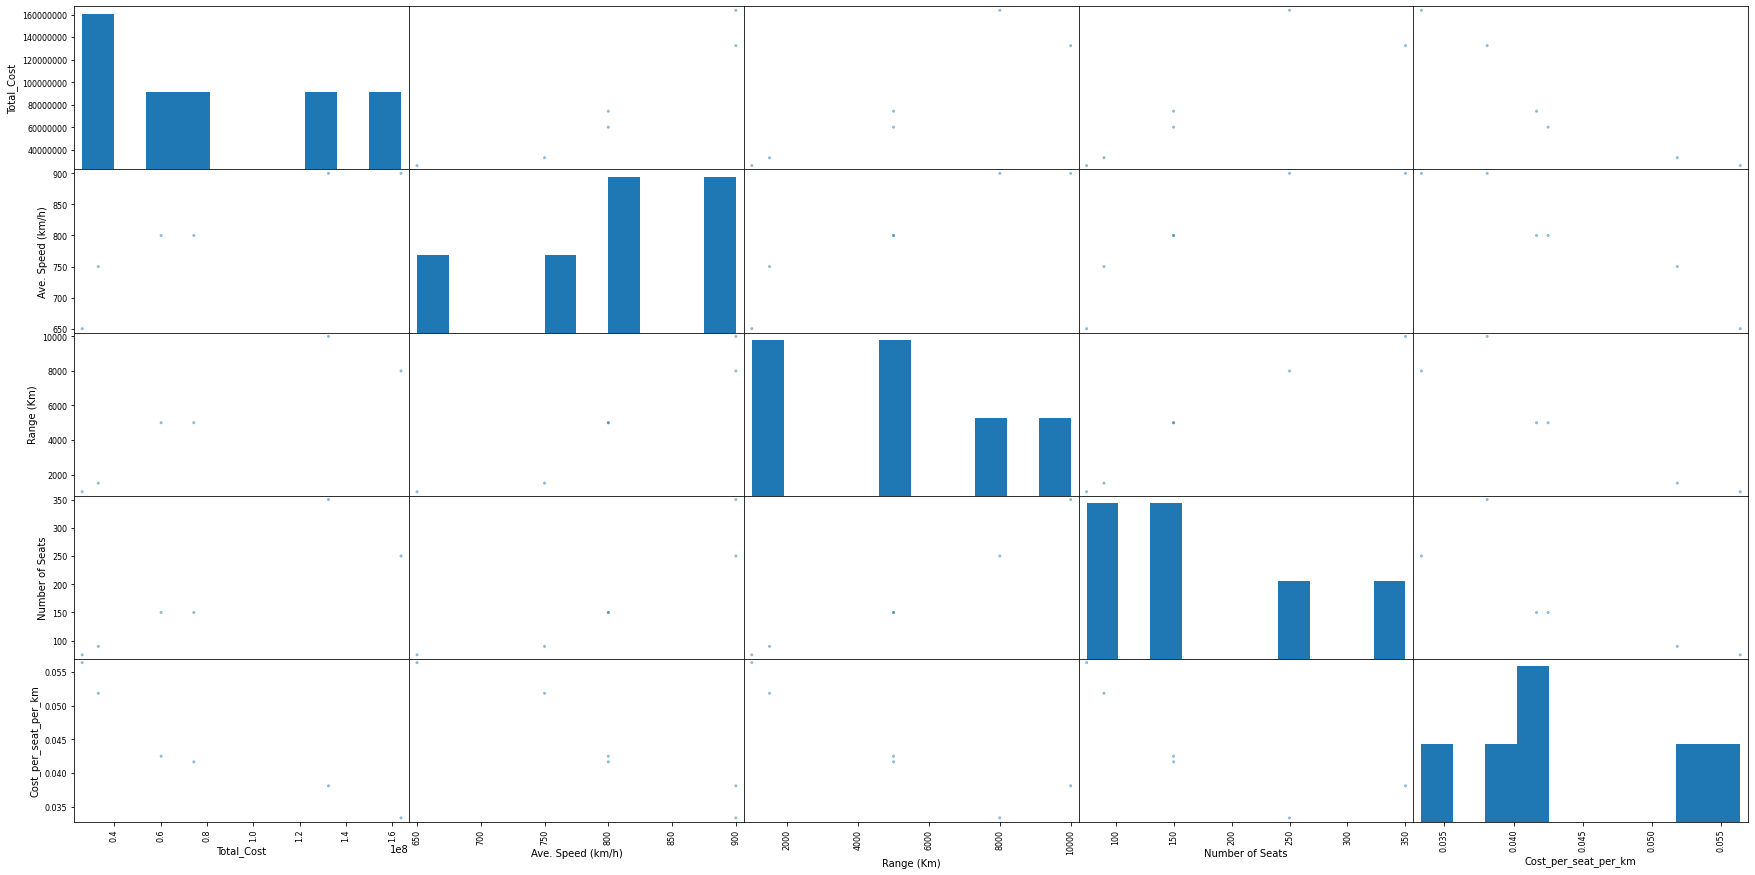

In [26]:
from pandas.plotting import scatter_matrix
attributes= ['Total_Cost','Ave. Speed (km/h)','Range (Km)','Number of Seats','Cost_per_seat_per_km']
scatter_matrix(airline[attributes], figsize=(30,15))

In [27]:
Airlines_B=airline.drop(airline.iloc[:, 4:19],axis=1)

In [28]:
Airlines_B

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Cost_per_seat_per_km
0,A320,5000,800,150,0.041667
1,A330,8000,900,250,0.033333
2,B737,5000,800,150,0.042500
3,B747,10000,900,350,0.038095
4,Q400,1500,750,90,0.051852
5,ATR72,1000,650,75,0.056410


In [29]:
# dataframe with added travel cost
import numpy as np
for origin_city,dest_city,pass_d,distance in cityPairs.itertuples(index=False):
    Airlines_B[str(origin_city)+'-'+str(dest_city)+' cost'] = np.where(Airlines_B['Range (Km)'] >= distance, (Airlines_B['Cost_per_seat_per_km'] * Airlines_B['Number of Seats'] * distance * np.ceil(pass_d / Airlines_B['Number of Seats'])).astype(int), "NaN")

In [30]:
Airlines_B

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Cost_per_seat_per_km,AA-BB cost,BB-CC cost,CC-AA cost,AA-DD cost
0,A320,5000,800,150,0.041667,56250,NaN,5000,12500
1,A330,8000,900,250,0.033333,50000,108333,6666,16666
2,B737,5000,800,150,0.042500,57375,NaN,5100,12750
3,B747,10000,900,350,0.038095,80000,173333,5333,13333
4,Q400,1500,750,90,0.051852,NaN,NaN,7466,18666
5,ATR72,1000,650,75,0.056410,NaN,NaN,6769,16923


In [31]:
print("Min. Cost for thr given pair of routes:")
Airlines_B.iloc[ :, 5:].min()

Min. Cost for thr given pair of routes:


AA-BB cost     50000
BB-CC cost    108333
CC-AA cost      5000
AA-DD cost     12500
dtype: object

In [32]:
# for path AA-BB: A330 
# for path BB-CC: A330 
# for path CC-AA: A320
# for path AA-DD: A320

# Optimal aircraft type for each city pair along with the number of trips required:

In [33]:
optimal_data = [['A330', np.ceil(420/250)], ['A330', np.ceil(450/250)], ['A320', np.ceil(300/150)], ['A320', np.ceil(300/150)]]
res = pd.DataFrame(optimal_data, index = ['AA-BB','BB-CC','CC-AA','AA-DD'], columns = ['Suitable aircraft type','Number_of_trips_required'])
res

,Suitable aircraft type,Number_of_trips_required
AA-BB,A330,2.0
BB-CC,A330,2.0
CC-AA,A320,2.0
AA-DD,A320,2.0


In [34]:
print("The final optimal fleet consist of: A320,A330")

The final optimal fleet consist of: A320,A330
